
#EDA on the student alcohol consumption database

We used the UCI Machine Learning dataset from [here](https://www.kaggle.com/uciml/student-alcohol-consumption)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Attributes of the table and the meaning of their values

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th 
to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - 1 hour)

studytime - weekly study time (numeric: 1 - 10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or 
no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)
------------------------------------------------------------------------------------------
These grades are related with the course subject, Math:

G1 - first period grade (numeric: from 0 to 20)
G2 - second period grade (numeric: from 0 to 20)
G3 - final grade (numeric: from 0 to 20, output target)

In [ ]:
df.describe()

,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,Dalc,Walc,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.473418,16.696203,0.777215,0.711392,0.896203,2.749367,2.521519,0.308861,1.448101,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177,3.944304,3.235443,3.108861,3.554430,5.708861,1.481013,2.291139,10.908861,10.713924,10.415190
std,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.462610,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,1.390303,8.003096,0.890741,1.287897,3.319195,3.761505,4.581443
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000
25%,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,1.000000,1.000000,8.000000,9.000000,8.000000
50%,0.000000,17.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,1.000000,2.000000,11.000000,11.000000,11.000000
75%,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,5.000000,8.000000,2.000000,3.000000,13.000000,13.000000,14.000000
max,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,75.000000,5.000000,5.000000,19.000000,19.000000,20.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    int64 
 2   age         395 non-null    int64 
 3   address     395 non-null    int64 
 4   famsize     395 non-null    int64 
 5   Pstatus     395 non-null    int64 
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    int64 
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    int64 
 16  famsup      395 non-null    int64 
 17  paid        395 non-null    int64 
 18  activities  395 non-null    int64 
 19  nursery     395 non-null    int64 
 20  higher    

In [ ]:
df = pd.read_csv('data.csv')
df2 = df.copy()

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,Dalc,Walc,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,3,6,1,1,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,3,4,1,1,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,3,10,2,3,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,5,2,1,1,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,5,4,1,2,6,10,10


## Data cleaning 

We convert our categorical variables into numeric variables wherever possible

In [ ]:
df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]=np.where(df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]=='no',0,1)
df[['sex']]=np.where(df[['sex']]=='F',0,1)
df[['address']]=np.where(df[['address']]=='R',0,1)
df[['famsize']]=np.where(df[['famsize']]=='LE3',0,1)
df[['Pstatus']]=np.where(df[['Pstatus']]=='A',0,1)
df[['guardian']]=np.where(df[['guardian']]=='mother',0,1)
df = df.drop(columns=['school','Mjob','Fjob','reason'])

## Plotting correlation matrix 

If any of the drivers were found to be highly correlated (>0.7), we can drop them from the dataset. However as seen from the heatmap below, our data is largely uncorrelated, so we can use all the driver data for our model.

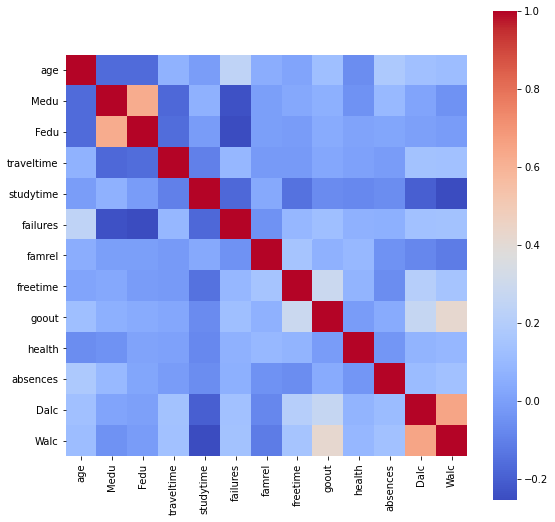

In [ ]:
def plot_corr(df, size=9):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='coolwarm',square=True, ax=ax)
    
plot_corr(df2.loc[:,:'Walc'])

## Feature Importance Plots

We wanted to understand which of the drivers had the most significant contribution towards heart disease in the person, and plotted a graph of features and their scores after fitting the data to a KNN Classifier and a Decision Tree Classifier.

In KNN Classifier the top 5 features are:

[11 , 12 , 2 , 8 , 9] = [ca , thal , cp , exang , oldpeak]

In Decision Tree Classifier the most features are:

[12 , 3 , 4 , 0 , 7] = [thal , trestbps , chol , age , thalach]

For Support Vector Machine Classifiers, a linear kernel model is required to find feature importance which is calculated in terms of the coefficients/weights assigned to each feature.

Feature: 0, Score: 0.02987
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.01519
Feature: 5, Score: 0.01620
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00405
Feature: 8, Score: 0.01316
Feature: 9, Score: 0.01620
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: -0.02127
Feature: 19, Score: 0.02785
Feature: 20, Score: 0.01519
Feature: 21, Score: 0.01114
Feature: 22, Score: -0.00203


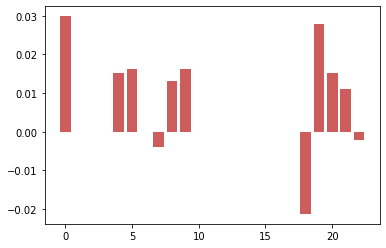

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

y = df.loc[:,'Walc':'Walc'].values
X = df.loc[:,'age':'absences'].values

y = y.reshape(395,)

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

model = KNeighborsClassifier()
model.fit(X, y)
results = permutation_importance(model, X, y, scoring='accuracy')
importance = results.importances_mean
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance , color = 'indianred')
pyplot.show()

Feature: 0, Score: 0.06174
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.07770
Feature: 5, Score: 0.12598
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.07372
Feature: 8, Score: 0.07360
Feature: 9, Score: 0.05855
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.06792
Feature: 19, Score: 0.10158
Feature: 20, Score: 0.08158
Feature: 21, Score: 0.09714
Feature: 22, Score: 0.18048


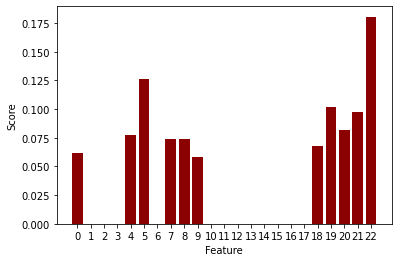

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

y = df.loc[:,'Walc':'Walc'].values
X = df.loc[:,'age':'absences'].values

y = y.reshape(395,)

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

model1 = DecisionTreeClassifier()
model1.fit(X, y)
importance = model1.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance, color = 'darkred')
plt.xticks(np.arange(0, 23, step=1))
plt.xlabel('Feature')
plt.ylabel('Score')
pyplot.show()


## Recursive Feature Elimination

There are two important factors which affect the result of RFE: 
- number of features selected 
- algorithm used to choose features 

For our example, we have used the SVC algorithm and selected the top 5 features.

From the heatmap, we can see that the top 5 selected features are:

[4 8 18 20 22] = [school Mjob	activities	higher	internet]

Feature [00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22]
Ranking [ 2  9  8  7  1  2  6  4  1  4  9 10  8  7 10  6  5  5  1  3  1  3  1]


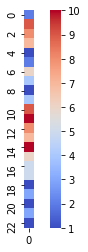

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE

y = df.loc[:,'Walc':'Walc'].values
X = df.loc[:,'age':'absences'].values

y = y.reshape(395,)

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=5, step=2)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(23,1)

print('Feature','[00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22]')
print('Ranking',rfe.ranking_)
sns.heatmap(ranking, cmap='coolwarm',square=True)

## Boxplot for RFE

Based on the top 5 features selected via RFE, we study the statisctical parameters of the features with respect to target (heart disease diagnosis)

We exclude exang and thal parameters as they has a set of distinct values rather than a range of values, which is required bor a boxplot.

In [ ]:
sns.boxplot(x="target", y="thalach", palette ='coolwarm',data=df)

In [ ]:
sns.boxplot(x="target", y="oldpeak", palette ='coolwarm',data=df)

In [ ]:
sns.boxplot(x="target", y="ca", palette ='coolwarm',data=df)